# NoisET example: detection of responding clones

In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its second function (ie detection of responding clones following a stimulus). The output is the <strong>list </strong> of  <strong> responding clones </strong>.
Prior starting this task, experimental noise parameters should be learnt thanks to first function of <em> NoisET </em>. Picked noise model and two sets of experimental noise parameters learnt at both times are required as inputs to the second function. 

In this notebook, we give an examplue using data from [Precise tracking of vaccine-responding T cell clones reveals convergent and personalized response in identical twins, Pogorelyy et al, PNAS](https://www.pnas.org/content/115/50/12704)
As peak response is supposed to be 15 days after the Yellow Fever vaccine injection, we spot here thanks to <em> NoisET </em> the expanded clones from day 0 to day 15 for individual $S_1$.

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

import pandas as pd
import matplotlib.pyplot as plt

### Import data 

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the expansion.

In [6]:
# Load data
path = '../../Data-sets/Yellow_fever/'
filename1 = 'S1_0_F1_.txt' # first biological replicate
filename2 = 'S1_15_F1_.txt' # second biological replicate
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

cl_S1 = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , cl_S1.filename1)
print("Second Filename is : ",  cl_S1.filename2)
print("Name of the columns of first file are : ", cl_S1.colnames1)
print("Name of the columns of second file are : ", cl_S1.colnames2)

First Filename is :  S1_0_F1_.txt
Second Filename is :  S1_15_F1_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


- Create the data-frame 

In [7]:
n, df = cl_S1.import_data()

In [8]:
df

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.007298,3.108825e-03,7000.0,3492.0,TGCGCCAGCAGCCCCCAGTTCACAGGCTCCTACGAGCAGTACTTC,CASSPQFTGSYEQYF
1,0.004135,3.081227e-03,3966.0,3461.0,TGTGCCAGCAGTTCCCCCATAGCGGGACAAAGCTCCTACGAGCAGT...,CASSSPIAGQSSYEQYF
2,0.003358,2.002219e-03,3221.0,2249.0,TGCAGTGCTTCTCTTGCGTCGGGCACCGGGGAGCTGTTTTTT,CSASLASGTGELFF
3,0.002515,1.779651e-03,2412.0,1999.0,TGTGCCAGCAGTTACGGACAGGGCAATCAGCCCCAGCATTTT,CASSYGQGNQPQHF
4,0.002389,1.395944e-03,2292.0,1568.0,TGTGCCAGCAGTTGGGGACAGGGGGTAAACGAGCAGTACTTC,CASSWGQGVNEQYF
...,...,...,...,...,...,...
1258568,0.000000,8.902706e-07,0.0,1.0,TGAAGCTTTCTTT,*S_FF
1258569,0.000000,8.902706e-07,0.0,1.0,ACCCCTCCACTTT,TP_HF
1258570,0.000000,8.902706e-07,0.0,1.0,TGTGCCCTAAGT,CALS
1258571,0.000000,8.902706e-07,0.0,1.0,TGTGCCAGGTTT,CARF


- Visualization of the data

<IPython.core.display.Javascript object>


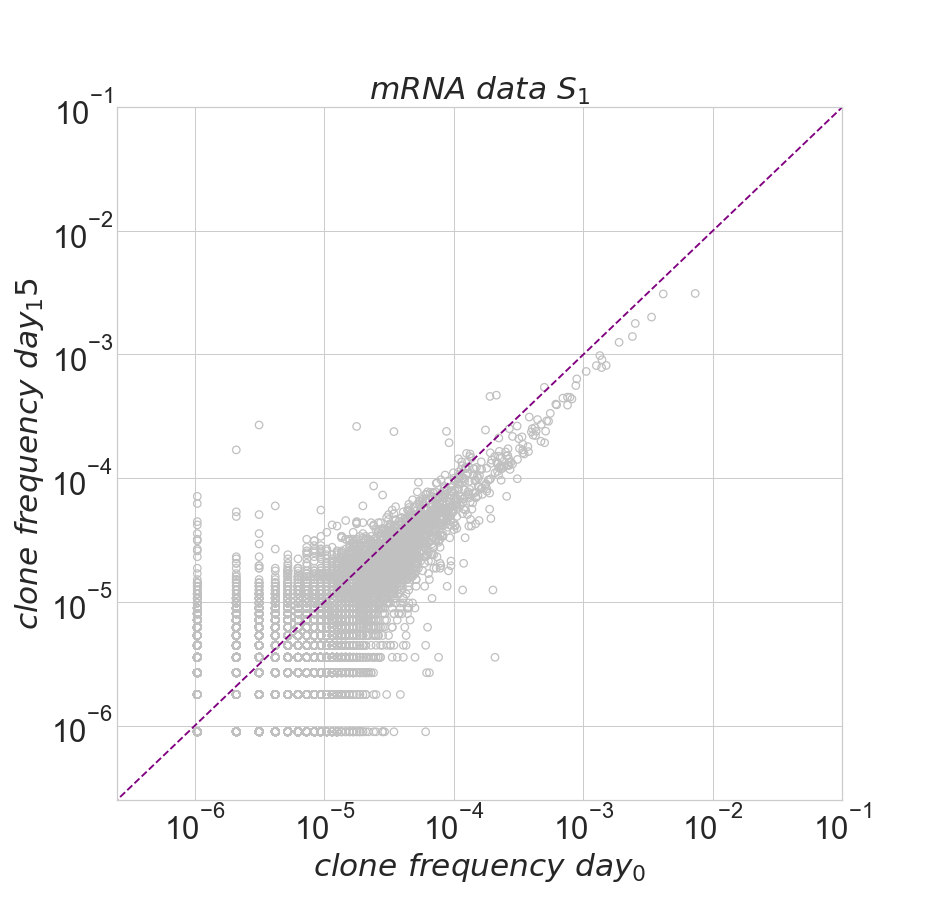

Text(0.5, 1.0, '$ mRNA \\ data \\ S_1 $')

In [9]:
%matplotlib notebook 

plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(df['Clone_fraction_1'], df['Clone_fraction_2'], c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xlabel(r'$clone \ frequency \ day_0 $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ day_15 $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ mRNA \ data \ S_1 $', fontsize = 25)

## Expansion 

In [11]:
paras_1 = [-2.02192528,   0.45220384,   1.06806274, -10.18866972] #parameters for the noise model for time_1 S1
paras_2 =  [-2.02192528,   0.45220384,   1.06806274, -10.18866972] #parameters for the noise model for time_2 S2

noise_model = 1 # Negative Binomial Sampling Noise Model

In [12]:
expansion = ns.Expansion_Model()

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:519: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:519: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:621: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)


N_obs: 1258573
Calculation Surface : 

--- 392.5075330734253 seconds ---


<IPython.core.display.Javascript object>


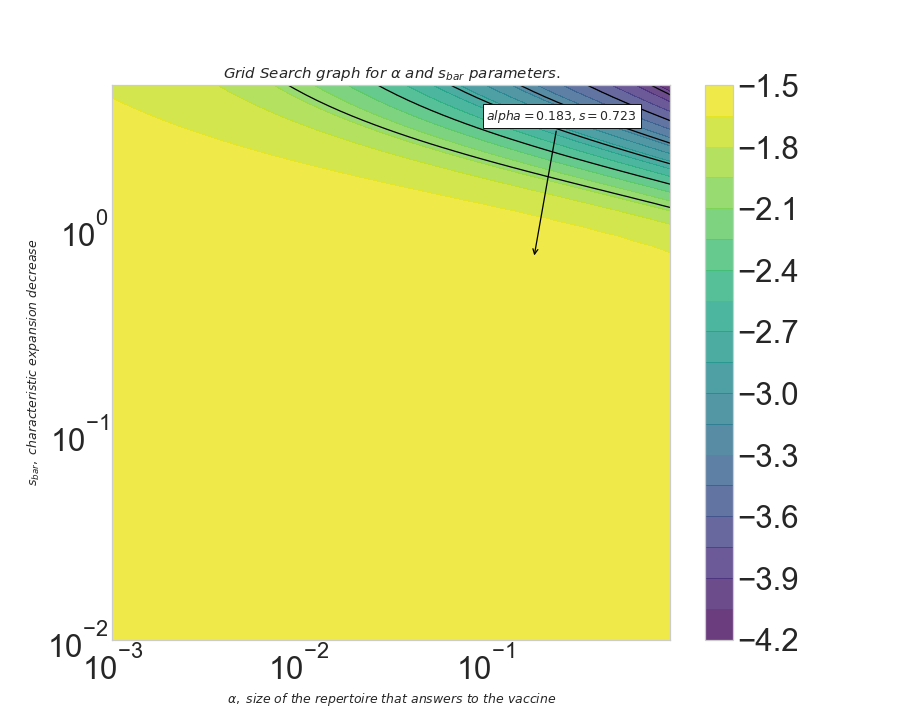

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:934: RuntimeWarning: divide by zero encountered in true_divide
  Ps_n1n2ps=Pn1n2_s*Ps[:,np.newaxis,np.newaxis]/Pn1n2_ps[np.newaxis,:,:]
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:934: RuntimeWarning: invalid value encountered in true_divide
  Ps_n1n2ps=Pn1n2_s*Ps[:,np.newaxis,np.newaxis]/Pn1n2_ps[np.newaxis,:,:]


writing to: testexpansion_S1_0_15


In [13]:
# 2 thresholds to set for the detection
pval_threshold = 0.05 
smed_threshold = 0 

outpath = 'testexpansion_S1_0_15' # name of the file

expansion.expansion_table(outpath, paras_1, paras_2, df, noise_model, pval_threshold, smed_threshold)

In [15]:
table_expansion = pd.read_csv('testexpansion_S1_0_15top_expanded.csv', sep = '\t')
table_expansion

,"$s_{1,low}$","$s_{2,med}$","$s_{3,high}$",$s_{max}$,$\bar{s}$,$f_1$,$f_2$,$n_1$,$n_2$,CDR3_nt,CDR3_AA,$1-P(s>0)$
0,6.261292,9.000607,15.164067,8.022281,9.492782,0.000000,0.001557,0.0,1749.0,TGTGCCAGCAGCTTGGGCCCAGGAGGTCTCTACGAGCAGTACTTC,CASSLGPGGLYEQYF,0.000000e+00
1,6.750456,9.391938,15.555398,8.511444,9.910586,0.000000,0.002363,0.0,2654.0,TGCGCCAGCAGCTACGGACAGAACTACAATGAGCAGTTCTTC,CASSYGQNYNEQFF,0.000000e+00
2,5.869961,8.609277,14.772736,7.630950,9.110340,0.000000,0.001063,0.0,1194.0,TGCAGTGGTCCTATAGCGGGGGGGCCTAATGAGCAGTTCTTC,CSGPIAGGPNEQFF,2.731690e-217
3,5.869961,8.609277,14.772736,7.630950,9.075417,0.000000,0.001026,0.0,1153.0,TGTGCCAGCAGCGCCTCGGGGGACGCCTACGAGCAGTACTTC,CASSASGDAYEQYF,6.026786e-210
4,5.869961,8.511444,14.674903,7.630950,9.027273,0.000000,0.000978,0.0,1099.0,TGTGCCAGCAGCCGTGGACAGGTGGCGAACACCGGGGAGCTGTTTTTT,CASSRGQVANTGELFF,2.888308e-200
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0.000000,3.815475,9.978934,0.000000,4.169008,0.000000,0.000012,0.0,13.0,TGTGCCAGCAGTGGGACAGGGCGGGGAGGACAGCCCCAGCATTTT,CASSGTGRGGQPQHF,3.697852e-02
1062,0.000000,3.815475,9.978934,0.000000,4.169008,0.000000,0.000012,0.0,13.0,TGTGCCAGCAGTCCTAGTTCGGGGGCCTCCTACGAGCAGTACTTC,CASSPSSGASYEQYF,3.697852e-02
1063,0.000000,3.815475,9.978934,0.000000,4.169008,0.000000,0.000012,0.0,13.0,TGCGCCAGCAGCTTGGAGGTAGCTGGGTTCAATGAGCAGTTCTTC,CASSLEVAGFNEQFF,3.697852e-02
1064,0.000000,3.815475,9.978934,0.000000,4.169008,0.000000,0.000012,0.0,13.0,TGCGCCAGCAGCTTGACAGATACGCAGTATTTT,CASSLTDTQYF,3.697852e-02


Detected clones are stressed in purple.

<IPython.core.display.Javascript object>


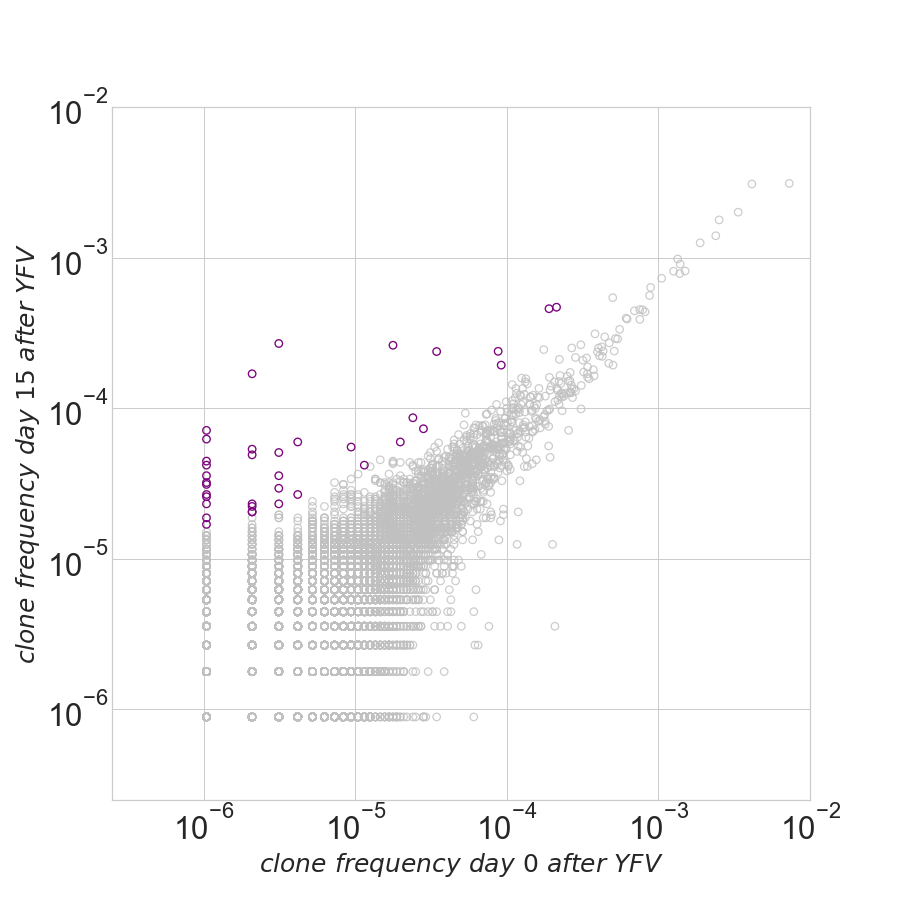

[2.5e-07, 0.01, 2.5e-07, 0.01]

In [16]:
%matplotlib notebook 
plt.figure(figsize=(10,10))

plt.style.use('seaborn-whitegrid')
plt.scatter(df['Clone_fraction_1'], df['Clone_fraction_2'], c='none', alpha = 0.8, edgecolor='silver')
plt.scatter(table_expansion['$f_1$'], table_expansion['$f_2$'], c='none', edgecolor='purple')

plt.xlabel(r'$clone \ frequency \ day \ 0 \ after \ YFV $', fontsize=20)
plt.ylabel(r'$clone \ frequency \ day \ 15 \ after \ YFV $', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-2, 2.5e-7, 1e-2])